# Testando arquivo delayAndSum.py

Esse arquivo foi gerado a partir da classe "delayAndSumParallel". Mas a ideia era fazer sem usar classes e objetos pra não gastar mta memória. Então eu basicamente reescrevi a classe de uma forma funcional. Nesse jupyter nós vamos testar todas as funções novamente pra garantir que está tudo funcionando conforme esperado.

In [20]:
import sys
import time
import os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/home/pi/Programming/IC2019/Raspberry/Python/")
sys.path.append("/home/pi/Programming/IC2019/DOA/Python/")

from SimularArrayMicrofonesClass import SimularArrayMicrofones
import delayAndSum as DaS

## Simulando um array de microfones

In [2]:
caminhoArquivoTeste = "/home/pi/GravacoesReSpeaker/exemplos_amostras_SESA_v2_16kHz_16bits/exemplos_janelados_200ms/casual_000_janela_0.wav"
objSimularArrayMics = SimularArrayMicrofones(caminhoArquivoTeste)
arraySinaisMics, delaysVerdadeiros, freqAmostragem = objSimularArrayMics.obterResultado()
print("Shape dos array de sinais simulados:", arraySinaisMics.shape)
print("Delays verdadeiros simulados:", delaysVerdadeiros)
print("Frequência de amostragem:", freqAmostragem)

Shape dos array de sinais simulados: (4, 3200)
Delays verdadeiros simulados: [0, -1, -1, 0]
Frequência de amostragem: 16000


## Testando cada função do arquivo

#### Função de calcular a correlação entre dois sinais

In [3]:
print(DaS.calcularCorrelacao(arraySinaisMics[0], arraySinaisMics[0]))
print(DaS.calcularCorrelacao(arraySinaisMics[0], arraySinaisMics[1]))
print(DaS.calcularCorrelacao(arraySinaisMics[0], arraySinaisMics[2]))
print(DaS.calcularCorrelacao(arraySinaisMics[0], arraySinaisMics[3]))

1.0
0.9472765515078326
0.9472765515078326
1.0


#### Função de Ajustar Sinais Dado Delay

Se eu ajustar com base nos delays verdadeiros, os sinais têm que se sobrepor.

SINAIS ANTES DO AJUSTE DE DELAYS:


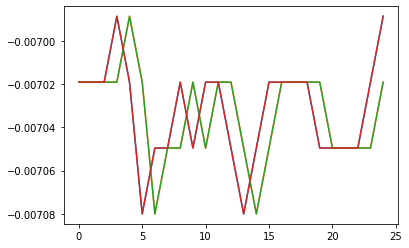



SINAIS DEPOIS DO AJUSTE DE DELAYS:


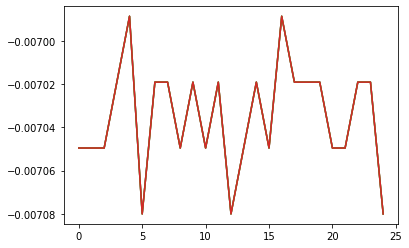

In [4]:
inicio = 100
fim    = inicio + 25

print("SINAIS ANTES DO AJUSTE DE DELAYS:")
plt.plot(arraySinaisMics[0][inicio:fim], label="Sinal 0")
plt.plot(arraySinaisMics[1][inicio:fim], label="Sinal 1")
plt.plot(arraySinaisMics[2][inicio:fim], label="Sinal 2")
plt.plot(arraySinaisMics[3][inicio:fim], label="Sinal 3")
plt.show()

sinal0Ajustado, sinal1Ajustado = DaS.ajustarSinaisDadoDelay(arraySinaisMics[0], arraySinaisMics[1], delaysVerdadeiros[1], delayMax=20)
__, sinal2Ajustado             = DaS.ajustarSinaisDadoDelay(arraySinaisMics[0], arraySinaisMics[2], delaysVerdadeiros[2], delayMax=20)
__, sinal3Ajustado             = DaS.ajustarSinaisDadoDelay(arraySinaisMics[0], arraySinaisMics[3], delaysVerdadeiros[3], delayMax=20)

print("\n\nSINAIS DEPOIS DO AJUSTE DE DELAYS:")
plt.plot(sinal0Ajustado[inicio:fim], label="Sinal 0")
plt.plot(sinal1Ajustado[inicio:fim], label="Sinal 1")
plt.plot(sinal2Ajustado[inicio:fim], label="Sinal 2")
plt.plot(sinal3Ajustado[inicio:fim], label="Sinal 3")
plt.show()

del sinal0Ajustado, sinal1Ajustado, sinal2Ajustado, sinal3Ajustado

#### Função para calcular o delay entre dois sinais

In [5]:
for i in range(len(arraySinaisMics)):
    print("Delay verdadeiro:", delaysVerdadeiros[i])
    print("Delay calculado:", DaS.calcularDefasagemEntreDoisSinais(arraySinaisMics[0], arraySinaisMics[i], 20), "\n")

Delay verdadeiro: 0
Delay calculado: 0 

Delay verdadeiro: -1
Delay calculado: -1 

Delay verdadeiro: -1
Delay calculado: -1 

Delay verdadeiro: 0
Delay calculado: 0 



#### Função para calcular o array de delays

In [6]:
print(delaysVerdadeiros)
print(DaS.calcularArrayDelays(arraySinaisMics, 20))

[0, -1, -1, 0]
[0, -1, -1, 0]


#### Função que aplica o delay and sum dado os delays desejados e os sinais

Essa ainda não é a função final que unifica tudo pois ele precisa receber o array de delays. A função que junta tudo vai chamar a função de calcular o array de delays e depois essa que eu vou testar agora.



SINAIS DEPOIS DO AJUSTE DE DELAYS:


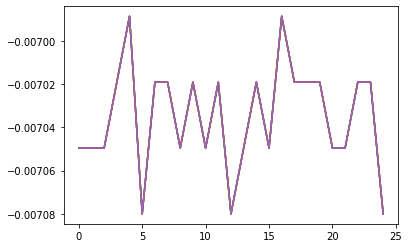

In [7]:
sinalDaS = DaS.executarDaS(arraySinaisMics, delaysVerdadeiros, 20, True)

sinal0Ajustado, sinal1Ajustado = DaS.ajustarSinaisDadoDelay(arraySinaisMics[0], arraySinaisMics[1], delaysVerdadeiros[1], delayMax=20)
__, sinal2Ajustado             = DaS.ajustarSinaisDadoDelay(arraySinaisMics[0], arraySinaisMics[2], delaysVerdadeiros[2], delayMax=20)
__, sinal3Ajustado             = DaS.ajustarSinaisDadoDelay(arraySinaisMics[0], arraySinaisMics[3], delaysVerdadeiros[3], delayMax=20)

print("\n\nSINAIS DEPOIS DO AJUSTE DE DELAYS:")
plt.plot(sinal0Ajustado[inicio:fim], label="Sinal 0")
plt.plot(sinal1Ajustado[inicio:fim], label="Sinal 1")
plt.plot(sinal2Ajustado[inicio:fim], label="Sinal 2")
plt.plot(sinal3Ajustado[inicio:fim], label="Sinal 3")
plt.plot(sinalDaS[inicio:fim], label="Sinal DaS")
plt.show()

del sinal0Ajustado, sinal1Ajustado, sinal2Ajustado, sinal3Ajustado

## Função final que unifica tudo

A função abaixo recebe um array com o sinal de cada microfone e o delay máximo possível pela geometria dos microfones. Ela calcula o array de delays entre cada microfone e retorna o sinal já beamformado.



SINAIS DEPOIS DO AJUSTE DE DELAYS:


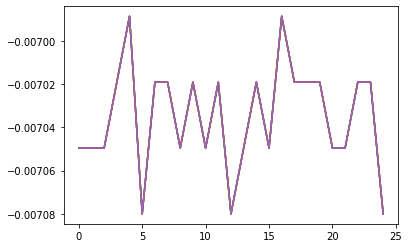

In [8]:
sinalDaS = DaS.delayAndSum(arraySinaisMics, delayMax=20, fazerMedia=True)

sinal0Ajustado, sinal1Ajustado = DaS.ajustarSinaisDadoDelay(arraySinaisMics[0], arraySinaisMics[1], delaysVerdadeiros[1], delayMax=20)
__, sinal2Ajustado             = DaS.ajustarSinaisDadoDelay(arraySinaisMics[0], arraySinaisMics[2], delaysVerdadeiros[2], delayMax=20)
__, sinal3Ajustado             = DaS.ajustarSinaisDadoDelay(arraySinaisMics[0], arraySinaisMics[3], delaysVerdadeiros[3], delayMax=20)

print("\n\nSINAIS DEPOIS DO AJUSTE DE DELAYS:")
plt.plot(sinal0Ajustado[inicio:fim], label="Sinal 0")
plt.plot(sinal1Ajustado[inicio:fim], label="Sinal 1")
plt.plot(sinal2Ajustado[inicio:fim], label="Sinal 2")
plt.plot(sinal3Ajustado[inicio:fim], label="Sinal 3")
plt.plot(sinalDaS[inicio:fim], label="Sinal DaS")
plt.show()

del sinal0Ajustado, sinal1Ajustado, sinal2Ajustado, sinal3Ajustado

# Tempo de processamento para rodar o DaS em 4 mics com janelas de 200ms

In [17]:
dirOrigem = "/home/pi/GravacoesReSpeaker/exemplos_amostras_SESA_v2_16kHz_16bits/exemplos_janelados_200ms/"

arrayTempos = []
for arquivoAtual in os.listdir(dirOrigem):
    
    print(arquivoAtual, end=", ")
    
    # SIMULANDO O ARRAY
    objSimularArrayMics     = SimularArrayMicrofones(dirOrigem + arquivoAtual)
    arraySinaisMics, __, __ = objSimularArrayMics.obterResultado()

    # COMECANDO A MEDIR O TEMPO
    tempoInicio = time.time()
    
    # APLICANDO O DAS
    sinalDaS = DaS.delayAndSum(arraySinaisMics)
    
    # PARANDO DE MEDIR O TEMPO
    tempoFim = time.time()
    arrayTempos.append(tempoFim - tempoInicio)    

siren_000_janela_81.wav, siren_000_janela_92.wav, gunshot_000_janela_0.wav, siren_000_janela_97.wav, siren_000_janela_89.wav, siren_000_janela_114.wav, gunshot_000_janela_20.wav, siren_000_janela_59.wav, siren_000_janela_38.wav, siren_000_janela_48.wav, casual_000_janela_2.wav, casual_000_janela_4.wav, gunshot_000_janela_25.wav, siren_000_janela_4.wav, siren_000_janela_15.wav, explosion_000_janela_19.wav, explosion_000_janela_33.wav, siren_000_janela_90.wav, siren_000_janela_99.wav, siren_000_janela_73.wav, siren_000_janela_62.wav, siren_000_janela_80.wav, siren_000_janela_82.wav, siren_000_janela_21.wav, siren_000_janela_60.wav, explosion_000_janela_15.wav, casual_000_janela_3.wav, gunshot_000_janela_22.wav, gunshot_000_janela_15.wav, siren_000_janela_66.wav, gunshot_000_janela_19.wav, siren_000_janela_24.wav, explosion_000_janela_43.wav, siren_000_janela_113.wav, siren_000_janela_71.wav, siren_000_janela_32.wav, siren_000_janela_94.wav, siren_000_janela_105.wav, siren_000_janela_55.w

In [22]:
print("Tempo médio para aplicar o DaS com 4 mics em janelas de 200ms:", np.mean(arrayTempos), "+-", np.std(arrayTempos))

Tempo médio para aplicar o DaS com 4 mics em janelas de 200ms: 0.01636367515452857 +- 0.0029950273680378553


**Resultado:**

Tempo médio para aplicar o DaS com 4 mics em janelas de 200ms: 0.01636367515452857 +- 0.0029950273680378553

**Recaptulando resultados anteriores:**

Média de tempo para extraír as 58 features de um sinal de 200ms com a Raspberry: 0.115837 +- 0.00174 segundos.

Tempo médio para classificar uma única amostra (janela de 200ms) com a Raspberry: 5.7849987321845055e-06

Isso significa que o processamento inteiro em janelas de 200 ms com a Raspberry leva: 

**Processamento completo: 0.13220646015326076 segundos**.